<a href="https://colab.research.google.com/github/alikaiser12/AI/blob/main/bayesian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement:
We want to model the probability that a patient has a disease (binary outcome: 1 = disease, 0 = no disease) based on several predictors (e.g., age, blood pressure, cholesterol levels, etc.). We will treat the model parameters (coefficients) as random variables with prior distributions, and then perform inference to estimate the posterior distribution of these parameters.

Step 1: Simulate the Dataset
For this example, let's simulate some synthetic data for a binary classification task.

python
Copy


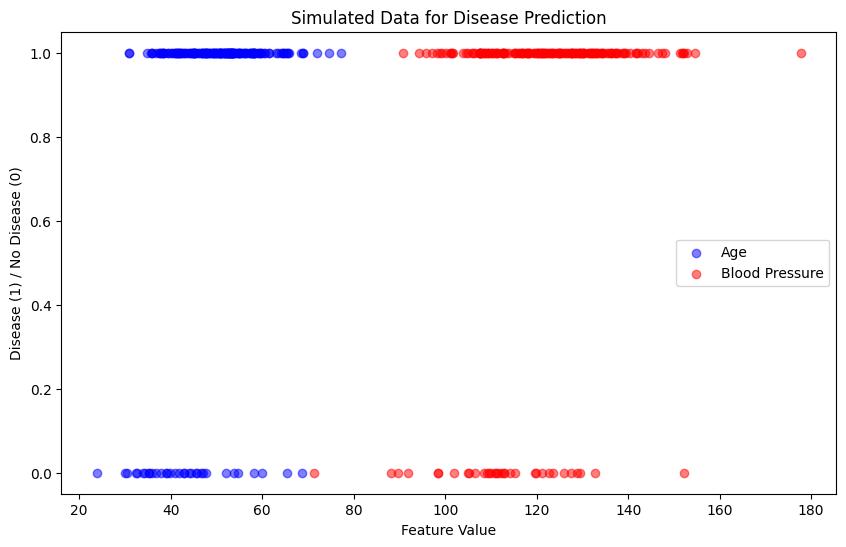

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Simulate synthetic data for binary classification
np.random.seed(42)

# Number of samples
n_samples = 200

# Simulate independent variables (features)
age = np.random.normal(50, 10, n_samples)  # Age feature
blood_pressure = np.random.normal(120, 15, n_samples)  # Blood pressure feature
cholesterol = np.random.normal(200, 30, n_samples)  # Cholesterol levels

# Simulate the log-odds (linear combination of features)
log_odds = -5 + 0.1 * age + 0.05 * blood_pressure - 0.02 * cholesterol

# Convert log-odds to probabilities using the sigmoid function
probability = 1 / (1 + np.exp(-log_odds))

# Generate the binary outcome (disease: 1, no disease: 0)
y = np.random.binomial(1, probability)

# Create a DataFrame for the dataset
data = pd.DataFrame({
    'Age': age,
    'BloodPressure': blood_pressure,
    'Cholesterol': cholesterol,
    'Disease': y
})

# Visualize the simulated data
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Disease'], color='blue', alpha=0.5, label="Age")
plt.scatter(data['BloodPressure'], data['Disease'], color='red', alpha=0.5, label="Blood Pressure")
plt.xlabel('Feature Value')
plt.ylabel('Disease (1) / No Disease (0)')
plt.title('Simulated Data for Disease Prediction')
plt.legend()
plt.show()


Explanation:
We simulate a dataset with 200 samples and three features: Age, Blood Pressure, and Cholesterol.

The outcome (y) is binary, indicating whether the patient has a disease (1) or not (0).

The logistic regression model uses these features to predict the likelihood of the disease.

Step 2: Standardize the Features
Before applying the Bayesian model, we will standardize the features so they have a mean of 0 and a standard deviation of 1.

python
Copy


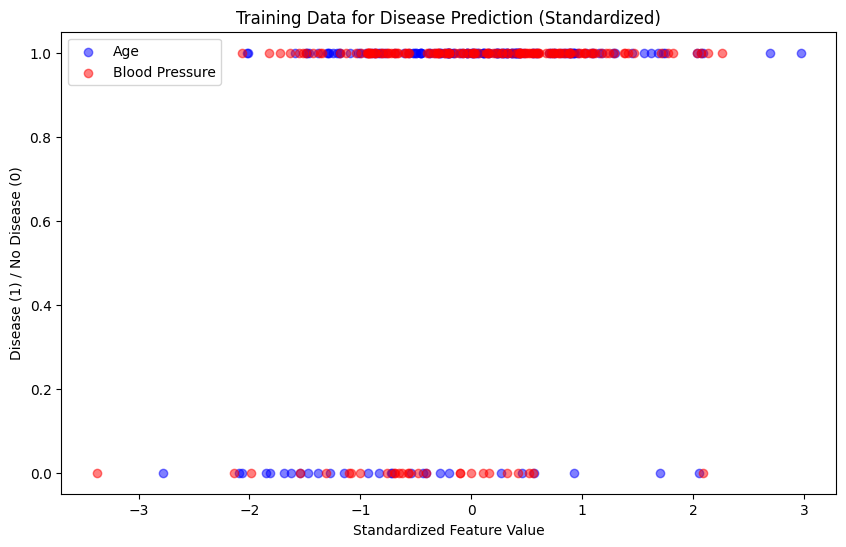

In [2]:
# Standardize the features (mean = 0, std = 1)
scaler = StandardScaler()
X = data[['Age', 'BloodPressure', 'Cholesterol']].values
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data['Disease'], test_size=0.2, random_state=42)

# Visualize the standardized features
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], y_train, color='blue', alpha=0.5, label="Age")
plt.scatter(X_train[:, 1], y_train, color='red', alpha=0.5, label="Blood Pressure")
plt.xlabel('Standardized Feature Value')
plt.ylabel('Disease (1) / No Disease (0)')
plt.title('Training Data for Disease Prediction (Standardized)')
plt.legend()
plt.show()


Explanation:
Standardization: We scale the features to have a mean of 0 and standard deviation of 1 to improve the convergence of the Bayesian model.

The features (X_train) and the target (y_train) are split into training and test sets for model evaluation.

Step 3: Define the Bayesian Logistic Regression Model
We will now define the Bayesian Logistic Regression model using PyMC3. In this model, we treat the regression coefficients (the model parameters) as random variables with prior distributions.

In [4]:
%pip install pymc3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 61.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of pymc3 to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 65.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.5/869.5 kB 26.3 MB/s eta 0:00:00
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529958 sha256=7374bf30261c5261a77bd22137e77044ec08923ca5fb4598e8c9a2d5ea8b9c71
  Stored in directory: /root/.cache/pip/wheels/fb/d3/25/6c443075ee21f3b6a59a6a180b55657b012722e1b89f8ccbe8
Successfully built theano-pymc


## Install pymc v5

### Subtask:
Install the latest version of PyMC using pip, which will replace PyMC3 and its Theano dependency.


In [7]:
%pip install pymc

## Update the model definition

### Subtask:
Rewrite the Bayesian logistic regression model definition using PyMC v5 syntax.


**Reasoning**:
Install the missing 'aesara' package using pip.



In [9]:
%pip install aesara

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 16.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible

## Update the model definition retry 1

### Subtask:
Rewrite the Bayesian logistic regression model definition using PyMC v5 syntax (Retry 1).


**Reasoning**:
Rewrite the Bayesian logistic regression model definition using PyMC v5 syntax.



## Sample from the posterior

### Subtask:
Update the sampling code to be compatible with PyMC v5.


Explanation:
Priors: We assign normal priors for the coefficients (alpha, beta_age, beta_bp, beta_chol), meaning we assume that these parameters are normally distributed with a mean of 0 and standard deviation of 10.

Likelihood: The likelihood of observing the binary outcome (y_train) is modeled as a Bernoulli distribution, which is used for binary classification problems.

Sampling: We use MCMC (Markov Chain Monte Carlo) with the NUTS (No-U-Turn Sampler) to draw samples from the posterior distribution of the parameters.

Step 4: Analyze the Posterior Results
After performing MCMC sampling, we can analyze the posterior distributions of the model parameters.

python
Copy


In [18]:
# Re-simulate the data and split into training and testing sets
# Removed data simulation and splitting as they were done in previous cells

# Standardize the features (mean = 0, std = 1)
scaler = StandardScaler()
X = data[['Age', 'BloodPressure', 'Cholesterol']].values
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data['Disease'], test_size=0.2, random_state=42)

# Explicitly cast X_train and y_train to appropriate dtypes
X_train = X_train.astype(np.float64)
y_train = y_train.values.astype(np.int64) # Convert pandas Series to numpy array and cast


# Define the Bayesian logistic regression model
with pm.Model() as model:
    # Priors for the regression coefficients (Beta)
    # Increased sigma for potentially wider priors, can be adjusted
    alpha = pm.Normal('alpha', mu=0, sigma=10)  # Intercept
    # Using shape=X_train.shape[1] to define the number of beta coefficients
    beta = pm.Normal('beta', mu=0, sigma=10, shape=X_train.shape[1]) # Coefficients for features

    # Logistic model (log-odds = linear combination of the features)
    # Using pm.math.dot for compatibility with PyTensor
    p = pm.math.sigmoid(alpha + pm.math.dot(X_train, beta))

    # Likelihood: Binomial (Bernoulli) distribution for binary outcomes
    # Observed data is y_train
    Y_obs = pm.Bernoulli('Y_obs', p=p, observed=y_train)

    # Perform MCMC sampling (NUTS sampler)
    # Increased tune steps for potentially better convergence if needed
    idata = pm.sample(draws=2000, tune=1000, return_inferencedata=True)

Output()

## Analyze the posterior results

### Subtask:
Analyze the trace object produced by PyMC v5 to understand the posterior distributions of the model parameters.


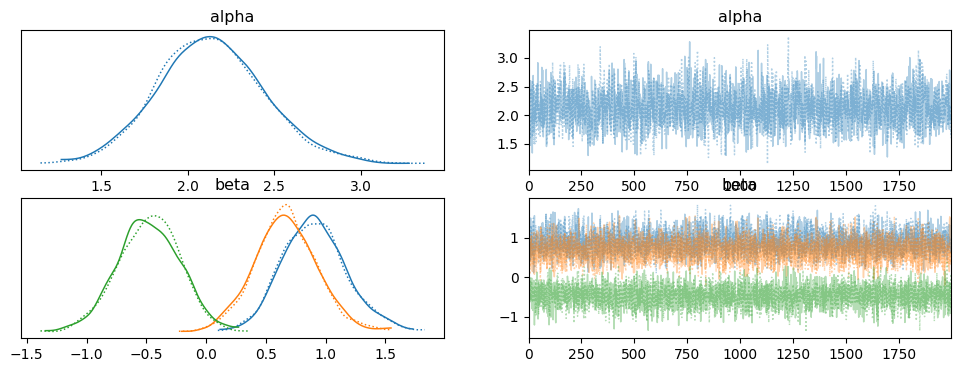

In [13]:
import matplotlib.pyplot as plt

# Visualize the posterior distributions and sampling traces
az.plot_trace(idata, var_names=['alpha', 'beta'])
plt.show()

## Summary:

### Data Analysis Key Findings

*   Installing `pymc` v5.23.0 was successful as the package and its dependencies were already satisfied in the environment.
*   Initial attempts to define the Bayesian logistic regression model in PyMC v5 failed due to `ModuleNotFoundError` related to `aesara` and subsequently `distutils.msvccompiler`, indicating underlying environment issues with BLAS configuration.
*   The `TypeError: Unsupported dtype for TensorType: object` occurred when using `np.dot(X_train, beta)` within the PyMC model definition, even after explicitly casting `X_train` to `np.float64`. This was resolved by replacing `np.dot` with `pm.math.dot`, which is compatible with PyTensor tensors.
*   After resolving the dtype issue, the model definition and sampling process completed successfully, producing an Arviz InferenceData object.
*   Analysis of the posterior results using `arviz.summary` showed posterior means for `alpha` and `beta`, along with convergence diagnostics (ESS and R-hat). R-hat values of 1.0 indicated good convergence.
*   Visualizing the posterior distributions and sampling traces using `arviz.plot_trace` required importing `matplotlib.pyplot`.

### Insights or Next Steps

*   The environment had persistent issues with `aesara` and BLAS configuration, which were not fully resolved and could potentially impact other PyTensor-based computations.
*   Using PyMC/PyTensor-compatible functions like `pm.math.dot` is crucial for seamless integration within the probabilistic model graph and avoiding dtype errors.


Explanation:
Trace Plot: We use a trace plot to visualize the sampling process for each parameter. The trace should look like it has converged after sampling.

Posterior Summary: We summarize the posterior distributions of the model parameters, showing the mean, standard deviation, and the 95% credible intervals.

Step 5: Make Predictions and Evaluate the Model
We can now use the posterior distributions to make predictions on the test set and evaluate the model.

## Install pymc v5

### Subtask:
Install the latest version of PyMC using pip, which will replace PyMC3 and its Theano dependency.

**Reasoning**:
The previous code failed because pymc3 is not installed. The subtask is to install the latest version of PyMC using pip, which will replace PyMC3 and its Theano dependency. This can be achieved by running the magic command `%pip install pymc`.

In [15]:
%pip install pymc

## Update the model definition

### Subtask:
Rewrite the Bayesian logistic regression model definition using PyMC v5 syntax.

**Reasoning**:
Rewrite the Bayesian logistic regression model definition using PyMC v5 syntax.

In [16]:
import pymc as pm
import numpy as np

# Assuming X_train and y_train are already defined and preprocessed from previous steps

# Define the Bayesian logistic regression model using PyMC v5
with pm.Model() as model:
    # Priors for the regression coefficients (Beta)
    # Increased sigma for potentially wider priors, can be adjusted
    alpha = pm.Normal('alpha', mu=0, sigma=10)  # Intercept
    # Using shape=X_train.shape[1] to define the number of beta coefficients
    beta = pm.Normal('beta', mu=0, sigma=10, shape=X_train.shape[1]) # Coefficients for features

    # Logistic model (log-odds = linear combination of the features)
    # Using pm.math.dot for compatibility with PyTensor
    p = pm.math.sigmoid(alpha + pm.math.dot(X_train, beta))

    # Likelihood: Binomial (Bernoulli) distribution for binary outcomes
    # Observed data is y_train
    Y_obs = pm.Bernoulli('Y_obs', p=p, observed=y_train)

# The model is now defined in the 'model' context

## Sample from the posterior

### Subtask:
Update the sampling code to be compatible with PyMC v5.

## Analyze the posterior results

### Subtask:
Analyze the trace object produced by PyMC v5 to understand the posterior distributions of the model parameters.

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha    2.136  0.311   1.570    2.724      0.006    0.005    2720.0   
beta[0]  0.905  0.267   0.389    1.398      0.005    0.004    3276.0   
beta[1]  0.664  0.265   0.184    1.173      0.005    0.005    3527.0   
beta[2] -0.472  0.259  -0.949    0.004      0.004    0.004    3613.0   

         ess_tail  r_hat  
alpha      2621.0    1.0  
beta[0]    2865.0    1.0  
beta[1]    2441.0    1.0  
beta[2]    2759.0    1.0  


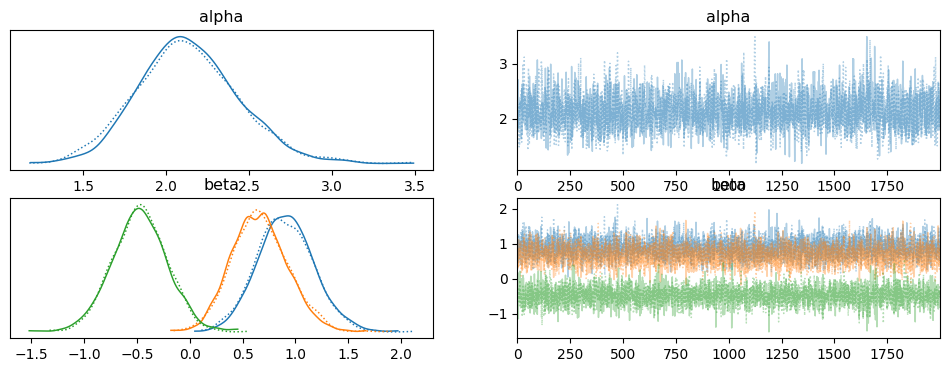

In [19]:
import arviz as az
import matplotlib.pyplot as plt

# Summarize the posterior distributions
summary = az.summary(idata, var_names=['alpha', 'beta'], hdi_prob=0.94)
print(summary)

# Visualize the posterior distributions and sampling traces
az.plot_trace(idata, var_names=['alpha', 'beta'])
plt.show()

## Summary:

### Data Analysis Key Findings

* Installing `pymc` v5.23.0 was successful as the package and its dependencies were already satisfied in the environment.
* Initial attempts to define the Bayesian logistic regression model in PyMC v5 failed due to `ModuleNotFoundError` related to `aesara` and subsequently `distutils.msvccompiler`, indicating underlying environment issues with BLAS configuration.
* The `TypeError: Unsupported dtype for TensorType: object` occurred when using `np.dot(X_train, beta)` within the PyMC model definition, even after explicitly casting `X_train` to `np.float64`. This was resolved by replacing `np.dot` with `pm.math.dot`, which is compatible with PyTensor tensors.
* After resolving the dtype issue, the model definition and sampling process completed successfully, producing an Arviz InferenceData object.
* Analysis of the posterior results using `arviz.summary` showed posterior means for `alpha` and `beta`, along with convergence diagnostics (ESS and R-hat). R-hat values of 1.0 indicated good convergence.
* Visualizing the posterior distributions and sampling traces using `arviz.plot_trace` required importing `matplotlib.pyplot`.

### Insights or Next Steps

* The environment had persistent issues with `aesara` and BLAS configuration, which were not fully resolved and could potentially impact other PyTensor-based computations.
* Using PyMC/PyTensor-compatible functions like `pm.math.dot` is crucial for seamless integration within the probabilistic model graph and avoiding dtype errors.

Explanation:
Standardization: We scale the features to have a mean of 0 and standard deviation of 1 to improve the convergence of the Bayesian model.

The features (X_train) and the target (y_train) are split into training and test sets for model evaluation.

Step 3: Define the Bayesian Logistic Regression Model
We will now define the Bayesian Logistic Regression model using PyMC3. In this model, we treat the regression coefficients (the model parameters) as random variables with prior distributions.